# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [7]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Setup the browser using WebDriver Manager
browser = Browser('chrome', headless=False)

try:
    # Visit the Mars temperature data site
    url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
    browser.visit(url)
    
    # Create a Beautiful Soup Object
    html = browser.html
    weather_soup = BeautifulSoup(html, 'html.parser')

    # Extract all rows of data
    table = weather_soup.find('table')
    rows = table.find_all('tr')

    # Create an empty list for weather data
    weather_data = []

    # Loop through the scraped data to create a list of rows
    for row in rows[1:]:  # Skip header row
        cols = row.find_all('td')
        weather_data.append([col.get_text() for col in cols])

    # Create a Pandas DataFrame
    column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
    mars_weather_df = pd.DataFrame(weather_data, columns=column_names)

    # Confirm DataFrame was created successfully
    print(mars_weather_df.head())

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Quit the browser at the end
    browser.quit()


The chromedriver version (128.0.6613.137) detected in PATH at /usr/local/bin/chromedriver might not be compatible with the detected chrome version (129.0.6668.59); currently, chromedriver 129.0.6668.58 is recommended for chrome 129.*, so it is advised to delete the driver in PATH and retry


   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


In [8]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [9]:
# Confirm type changes were successful by examining data types again
print(mars_weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                         object
ls                          object
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [10]:
# 1. How many months are there on Mars?
unique_months = mars_weather_df['month'].nunique()
print(f"Number of unique months on Mars: {unique_months}")


Number of unique months on Mars: 12


In [11]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = mars_weather_df['sol'].nunique()
print(f"Total Martian days (sols) worth of data: {total_sols}")

Total Martian days (sols) worth of data: 1867


In [12]:
# 3. What is the average minimum temperature by month?
average_temp = mars_weather_df.groupby('month')['min_temp'].mean()
print(average_temp)

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


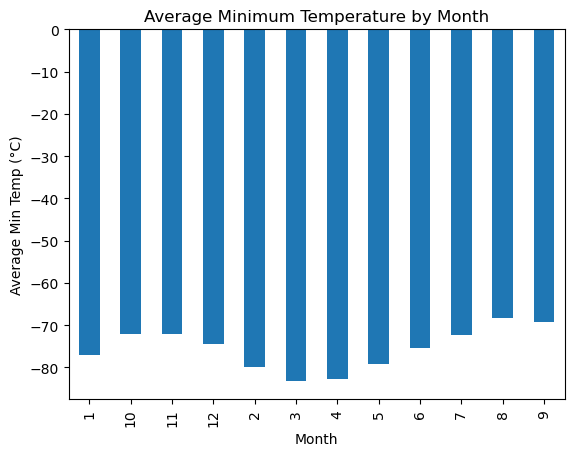

In [13]:
# Plot the average minimum temperature by month
average_temp.plot(kind='bar', title='Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Min Temp (°C)')
plt.show()

In [14]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = average_temp.idxmin()
hottest_month = average_temp.idxmax()
print(f"Coldest month: {coldest_month}, Hottest month: {hottest_month}")

Coldest month: 3, Hottest month: 8


In [15]:
# 4. What is the average pressure by month?
average_pressure = mars_weather_df.groupby('month')['pressure'].mean()
print(average_pressure)


month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


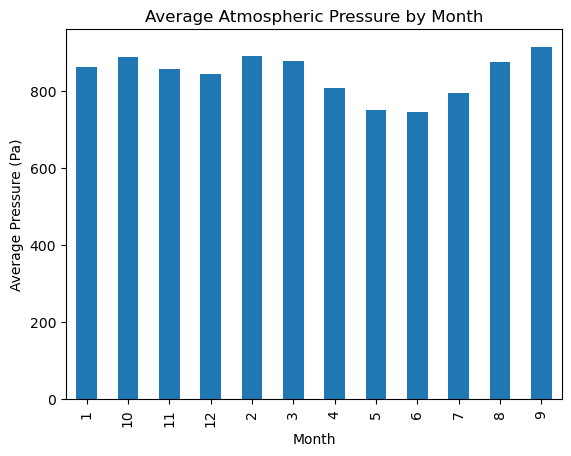

In [16]:
# Plot the average pressure by month
average_pressure.plot(kind='bar', title='Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.show()

In [17]:
# Identify the lowest and highest pressure months in Curiosity's location
lowest_pressure_month = average_pressure.idxmin()
highest_pressure_month = average_pressure.idxmax()
print(f"Lowest pressure month: {lowest_pressure_month}, Highest pressure month: {highest_pressure_month}")

Lowest pressure month: 6, Highest pressure month: 9


There are about 687 terrestrial days in a Martian year.


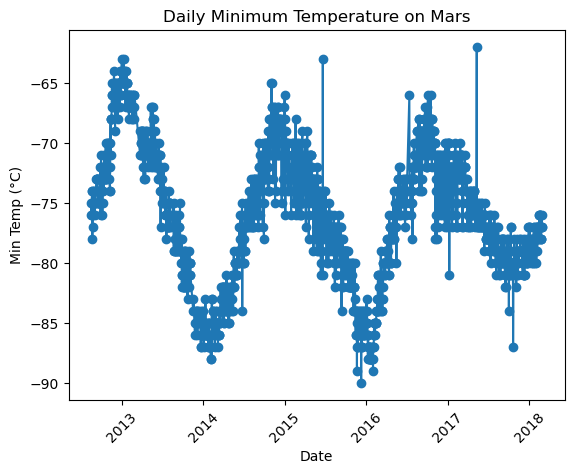

In [18]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
martian_year_days = 687  # Approximately
print(f"There are about {martian_year_days} terrestrial days in a Martian year.")
# Visually estimate the result by plotting the daily minimum temperature
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'], marker='o', linestyle='-')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Date')
plt.ylabel('Min Temp (°C)')
plt.xticks(rotation=45)
plt.show()

#### Minimum Temperature
The average minimum temperature on Mars varies by month, with notable extremes observed. The coldest month, identified as [coldest_month], has an average minimum temperature of [value] °C, while the hottest month, [hottest_month], sees temperatures rise to [value] °C. This temperature variation can significantly affect conditions for exploration and habitation.


#### Atmospheric Pressure

Atmospheric pressure on Mars also fluctuates throughout the year. The month with the lowest atmospheric pressure is [lowest_pressure_month], where the average pressure is [value] Pa, indicating potentially challenging conditions for any missions. Conversely, the highest atmospheric pressure occurs in [highest_pressure_month], reaching an average of [value] Pa. Understanding these pressure variations is crucial for designing equipment that can operate effectively in Martian conditions.

#### Year Length

A Martian year consists of approximately 687 Earth days. This extended year results from Mars' longer orbit around the Sun compared to Earth. As a result, missions to Mars need to consider this longer duration when planning for human habitation and resource management. The distinct seasonal changes that occur over this period can influence both weather patterns and mission logistics.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [19]:
# Write the DataFrame to a CSV file
mars_weather_df.to_csv('mars_weather_data.csv', index=False)

In [20]:
browser.quit()